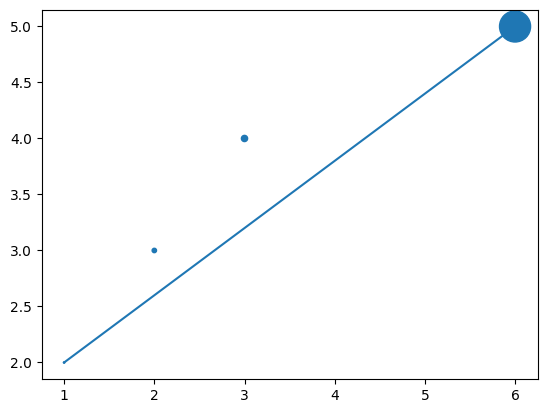

In [65]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'a': [1,2,3,6],
    'b': [2,3,4,5],
    's': [1,10,20,500]
}

edge = {
    'a': [1,6],
    'b': [2,5]
}
plt.scatter('a', 'b', 's', data=data)
plt.plot(edge['a'], edge['b'])
plt.show()

In [48]:
import csv


vertexData = {
    'a': [], # x
    'b': [], # y
    's': [], # radius
}

edgeData = {
    'a': [], # first vertex
    'b': [], # second vertex
    'distance': []
}

with open('data/circles-100/v.csv') as vertexFile:
    vreader = csv.reader(vertexFile)
    for row in vreader:
        vertexData['a'].append(row[0])
        vertexData['b'].append(row[1])
        vertexData['s'].append(20* float(row[2]) ** 2)
    

with open('data/circles-100/e.csv') as edgeFile:
    ereader = csv.reader(edgeFile)

    for row in ereader:
        # add v1 (source)
        edgeData['a'].append(row[0])
        edgeData['b'].append(row[1])
        # add v2 (destination)
        edgeData['a'].append(row[2])
        edgeData['b'].append(row[3])
        # add distance
        edgeData['distance'].append(row[4])


print(len(vertexData['s']), len(vertexData['a']), len(vertexData['b']))

100 100 100


100 100 100


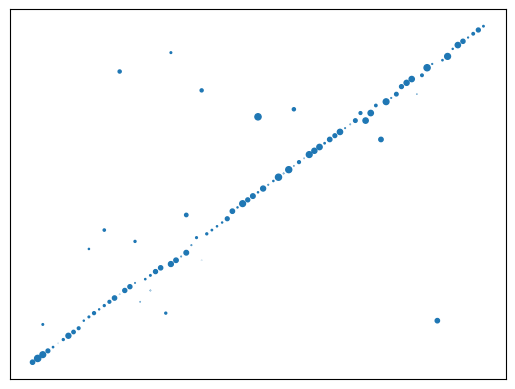

In [55]:
plt.scatter('a', 'b', 's', data=vertexData )

frame1 = plt.gca()
frame1.axes.xaxis.set_ticks([])
frame1.axes.yaxis.set_ticks([])

plt.show()

9900 9900


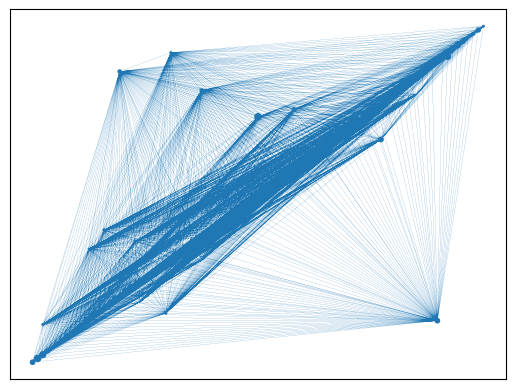

In [73]:
# plt.figure(figsize= (70,35))
print(len(edgeData['a']), len(edgeData['b']))
plt.scatter('a', 'b', 's', data=vertexData )
plt.plot(edgeData['a'], edgeData['b'], linewidth=0.05)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticks([])
frame1.axes.yaxis.set_ticks([])

plt.show()

In [75]:
def kClusters(k: int):
    for i in range(0, k):
        maxDistance = max(edgeData['distance'])
        maxIndex = edgeData['distance'].index(maxDistance)
        print('maxIndex', maxIndex, maxDistance)
        del edgeData['distance'][maxIndex]
        del edgeData['a'][2 * maxIndex]
        del edgeData['a'][2 * maxIndex]
        del edgeData['b'][2 * maxIndex]
        del edgeData['b'][2 * maxIndex]
        print(len(edgeData['a']), len(edgeData['b']), len(edgeData['distance']))

kClusters(3)

maxIndex 452 2.0
9898 9898 4949
maxIndex 668 2.0
9896 9896 4948
maxIndex 703 2.0
9894 9894 4947
